In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [2]:

df = pd.read_csv("/content/Iris.csv")
print(df.head())
print(df.shape)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(150, 6)


In [3]:
print("Missing values: ",df.isnull().sum())
# Option 1: Drop rows with missing values
# df = df.dropna()

# Option 2: Impute missing values with mean (for numerical columns)
df['SepalLengthCm'] = df['SepalLengthCm'].fillna(df['SepalLengthCm'].mean())
df['SepalWidthCm'] = df['SepalWidthCm'].fillna(df['SepalWidthCm'].median())
df['PetalLengthCm'] = df['PetalLengthCm'].fillna(df['PetalLengthCm'].mean())
df['PetalWidthCm'] = df['PetalWidthCm'].fillna(df['PetalWidthCm'].median())

# Option 3: Impute missing values in categorical columns with mode (for species)
df['Species'] = df['Species'].fillna(df['Species'].mode()[0])

# Verify if there are any remaining missing values
print(df.isnull().sum())


Missing values:  Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [4]:
df.drop('Id', axis=1, inplace=True)

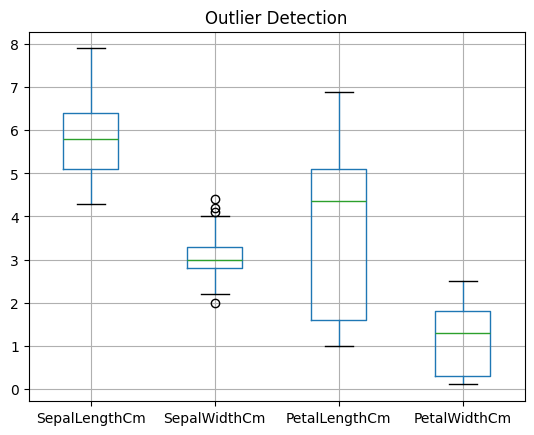

In [5]:
df.drop('Species', axis=1).boxplot()
plt.title("Outlier Detection")
plt.show()


In [6]:
X = df.drop('Species', axis=1)
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [9]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)


In [13]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [14]:
# Extract TP, TN, FP, FN for each class (multiclass case)
labels = df['Species'].unique()
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df)


                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               19                0               0
Iris-versicolor            0               12               1
Iris-virginica             0                0              13


In [15]:
# Compute TP, FP, TN, FN, Accuracy, Error Rate, Precision, Recall
total = np.sum(cm)
for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total - (TP + FP + FN)

    accuracy = (TP + TN) / total
    error_rate = 1 - accuracy
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    print(f"\nClass: {label}")
    print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
    print(f"Accuracy: {accuracy:.2f}, Error Rate: {error_rate:.2f}")
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")


Class: Iris-setosa
TP: 19, FP: 0, FN: 0, TN: 26
Accuracy: 1.00, Error Rate: 0.00
Precision: 1.00, Recall: 1.00

Class: Iris-versicolor
TP: 12, FP: 0, FN: 1, TN: 32
Accuracy: 0.98, Error Rate: 0.02
Precision: 1.00, Recall: 0.92

Class: Iris-virginica
TP: 13, FP: 1, FN: 0, TN: 31
Accuracy: 0.98, Error Rate: 0.02
Precision: 0.93, Recall: 1.00


In [18]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



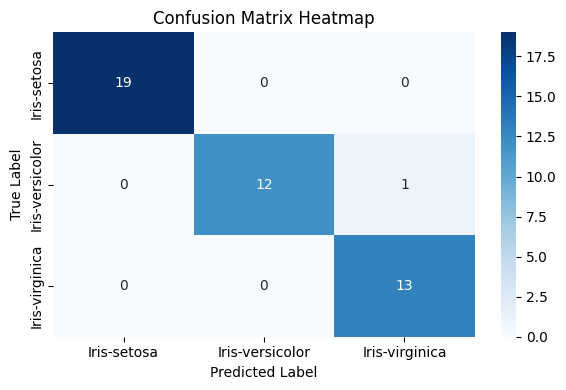

In [19]:
# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()